# Download Data dari UCI

In [ ]:
import os
if 'accent-recognition-mfcc--1.zip' not in os.listdir():
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00518/accent-recognition-mfcc--1.zip

!unzip -q /content/accent-recognition-mfcc--1.zip

replace accent-mfcc-data-1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ES-M-1-1.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace FR-F-1-9.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace GE-M-1-12.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace IT-F-1-1.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UK-F-2-11.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace US-F-2-9.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace US-F-4-1.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace US-M-2-3.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace US-M-2-7.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace US-M-5-9.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

# Support Vector Machine

# Attribute Information
Response variable:
language = {ES, FR, GE, IT, UK, US} The six possible accents considered

Explanatory variables:
X1, X2, ..., X12 Obtained using MFCC on the original time domain soundtrack of the maximum 1s of reading of a word

In [ ]:
df_audio = pd.read_csv('/content/accent-mfcc-data-1.csv')

Yang akan digunakan hanya 2 aksen : **UK** dan **US**

In [ ]:
df_audio = df_audio[(df_audio['language'] == 'UK') | (df_audio['language'] == 'US')]
# df_audio.reset_index(inplace=True)
# df_audio.drop(['index', 'level_0'], axis=1, inplace=True)n
df_audio.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
119,UK,1.540149,-7.160007,3.778773,6.718810,-9.347320,8.090564,-11.775473,3.118172,-0.357330,-4.251421,-0.937370,-5.712351
120,UK,3.976945,-3.000409,0.032001,9.452657,-8.132359,10.151162,-9.986733,1.355630,-0.373630,-3.752769,1.376127,-4.728709
121,UK,2.914937,-4.191264,3.497829,10.374831,-6.313394,10.032890,-10.618604,4.823223,1.174930,-3.979059,1.876738,-4.466675
122,UK,4.915523,-1.235624,0.599622,7.392184,-6.940796,12.207071,-9.472306,4.591876,1.369664,-4.563814,2.402545,-4.857425
123,UK,6.360545,-0.077513,0.726970,8.233986,-9.050965,11.700435,-7.767177,4.399710,-0.013150,-5.083522,2.555932,-6.796220


Data masih _imbalance_ sehingga akan dilakukan resampling

In [ ]:
df_audio['language'].value_counts()

US    165
UK     45
Name: language, dtype: int64

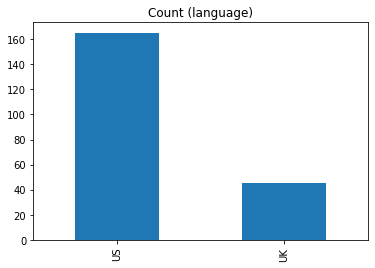

In [ ]:
language_count = df_audio.language.value_counts()
language_count
language_count.plot(kind='bar', title='Count (language)')

In [ ]:
df_audio.isnull().sum()

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
dtype: int64

In [ ]:
language_encoded = {'language' : {'UK' : 0, 'US' : 1}}
# df_audio.replace(language_encoded, inplace=True)
df_audio

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
119,UK,1.540149,-7.160007,3.778773,6.718810,-9.347320,8.090564,-11.775473,3.118172,-0.357330,-4.251421,-0.937370,-5.712351
120,UK,3.976945,-3.000409,0.032001,9.452657,-8.132359,10.151162,-9.986733,1.355630,-0.373630,-3.752769,1.376127,-4.728709
121,UK,2.914937,-4.191264,3.497829,10.374831,-6.313394,10.032890,-10.618604,4.823223,1.174930,-3.979059,1.876738,-4.466675
122,UK,4.915523,-1.235624,0.599622,7.392184,-6.940796,12.207071,-9.472306,4.591876,1.369664,-4.563814,2.402545,-4.857425
123,UK,6.360545,-0.077513,0.726970,8.233986,-9.050965,11.700435,-7.767177,4.399710,-0.013150,-5.083522,2.555932,-6.796220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [ ]:
Q1 = df_audio.quantile(0.25)
Q3 = df_audio.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df_audio[~((df_audio < lower_bound) | (df_audio > upper_bound).any(axis=1))]
df_audio

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
119,UK,1.540149,-7.160007,3.778773,6.718810,-9.347320,8.090564,-11.775473,3.118172,-0.357330,-4.251421,-0.937370,-5.712351
120,UK,3.976945,-3.000409,0.032001,9.452657,-8.132359,10.151162,-9.986733,1.355630,-0.373630,-3.752769,1.376127,-4.728709
121,UK,2.914937,-4.191264,3.497829,10.374831,-6.313394,10.032890,-10.618604,4.823223,1.174930,-3.979059,1.876738,-4.466675
122,UK,4.915523,-1.235624,0.599622,7.392184,-6.940796,12.207071,-9.472306,4.591876,1.369664,-4.563814,2.402545,-4.857425
123,UK,6.360545,-0.077513,0.726970,8.233986,-9.050965,11.700435,-7.767177,4.399710,-0.013150,-5.083522,2.555932,-6.796220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df_audio.loc[:, 'X1':]
Y = df_audio.loc[:, 'language']
std_scaler = StandardScaler()
df_audio_std = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)
df_audio_std

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,-0.821704,-0.718071,0.233143,-0.046644,-0.887799,-0.250785,-1.143804,-0.619423,0.322373,-0.514077,-0.710276,-0.612306
1,-0.352127,0.498349,-0.744194,0.536540,-0.656365,0.246986,-0.430741,-1.210901,0.318587,-0.426213,-0.125139,-0.314518
2,-0.556779,0.150099,0.159860,0.733258,-0.309876,0.218415,-0.682630,-0.047237,0.678231,-0.466086,0.001477,-0.235190
3,-0.171261,1.014438,-0.596131,0.097000,-0.429388,0.743625,-0.225670,-0.124873,0.723457,-0.569122,0.134465,-0.353486
4,0.107199,1.353112,-0.562913,0.276573,-0.831347,0.621238,0.454062,-0.189361,0.402306,-0.660697,0.173261,-0.940435
...,...,...,...,...,...,...,...,...,...,...,...,...
205,-1.219716,0.244535,0.173026,-1.160718,1.557683,-0.792058,0.462095,1.602357,-2.324567,1.491363,-0.420093,0.527641
206,-1.522014,1.061962,-0.434986,-1.597392,1.400683,-0.405538,0.991872,1.994405,-2.180524,1.420611,0.149363,1.109143
207,-0.710561,0.076926,0.643097,-0.695864,1.410080,-1.315585,1.756150,2.293566,-2.388774,1.568229,-0.626468,0.437359
208,-1.060758,1.470777,0.108235,-1.043864,1.585128,-0.588187,1.287599,2.361338,-2.361345,1.056931,-0.170245,0.441856


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

Hasil evaluasi model menggunakan XGBoost classifier sebelum di resampling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.48%


In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Menggunakan metode SMOTE untuk menyeimbangkan kelas pada dataset

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, Y)
df_audio_balanced = pd.DataFrame(X_sm, columns=X.columns)
df_language_balanced = pd.Series(y_sm)

X_train, X_test, y_train, y_test = train_test_split(df_audio_balanced, df_language_balanced, 
                                                    test_size=0.2, 
                                                    random_state=1, 
                                                    stratify=df_language_balanced)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


SVC adalah kelas yang digunakan pada modul sklearn.svm untuk membangun model menggunakan algoritma _support vector machine_.
Akurasi yang didapatkan sekitar 92%.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,
                     y_pred))


0.9242424242424242


# Support Vector Regression

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat

n
--2021-09-26 12:53:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59984 (59K) [application/x-httpd-php]
Saving to: ‘airfoil_self_noise.dat’

airfoil_self_noise. 100%[===================>]  58.58K  --.-KB/s    in 0.02s   

2021-09-26 12:53:18 (2.89 MB/s) - ‘airfoil_self_noise.dat’ saved [59984/59984]

n


In [ ]:
df_noise = pd.read_csv('/content/airfoil_self_noise.dat', sep='\t', header=None)
df_noise.columns = [
  'Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness', ' Scaled sound pressure level'
]

In [ ]:
df_noise.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [ ]:
df_noise.shape

(1503, 6)

In [ ]:
df_noise.describe()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [ ]:
df_audio.isnull().sum()

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
dtype: int64

In [ ]:
Q1 = df_noise.quantile(0.25)
Q3 = df_noise.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df_noise[~((df_noise < lower_bound) | (df_noise > upper_bound).any(axis=1))]
df_noise.shape

(1503, 6)

In [ ]:
X = df_noise.iloc[:, :-1]
y = df_noise.iloc[:, -1]

# df_noise_std = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)
# df_noise_std

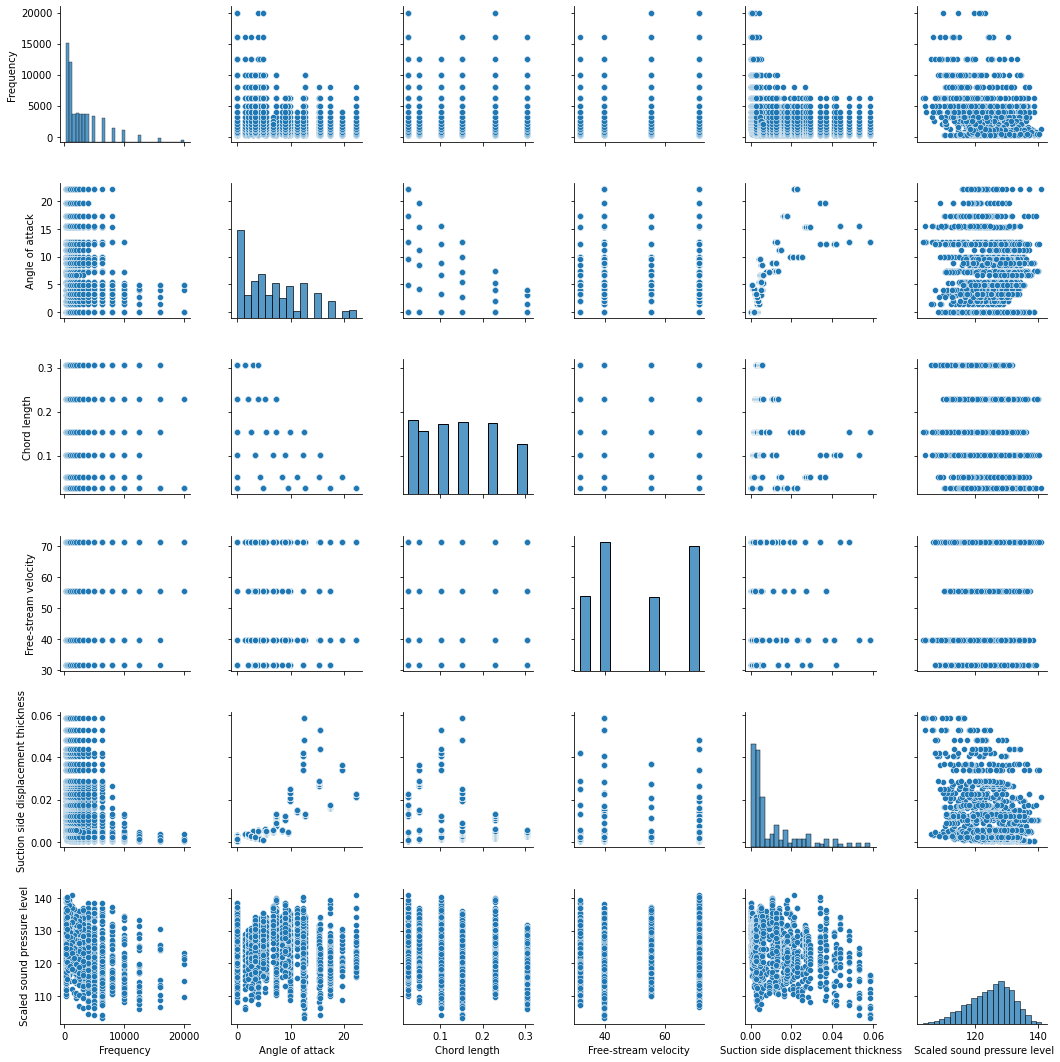

In [ ]:
import seaborn as sns

sns.pairplot(df_noise)

Melakukan split dataset dengan rasio 70:30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

Pada evaluasi model di bawah menggunakan _mean absolute error_ untuk model _support vector regression_ didapatkan nilai terkecil menggunakan kernel = (radial basis function) rbf. Dan untuk evaluasi menggunakan metrik _mean squared error_ juga didapatkan nilai terkecil menggunakan kernel = (radial basis function) rbf.

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

clf0 = SVR(kernel='rbf')
clf1 = SVR(kernel='poly')
clf2 = SVR(kernel='linear')
clf0.fit(X_train,y_train)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
y_train_pred0 = clf0.predict(X_train)
y_pred0 = clf0.predict(X_test)

y_train_pred1 = clf1.predict(X_train)
y_pred1 = clf1.predict(X_test)

y_train_pred2 = clf2.predict(X_train)
y_pred2 = clf2.predict(X_test)

print ('MAE train', mean_absolute_error(y_train, y_train_pred0))
print ('MAE test', mean_absolute_error(y_test, y_pred0))
print()
print ('MAE train', mean_absolute_error(y_train, y_train_pred1))
print ('MAE test', mean_absolute_error(y_test, y_pred1))
print()
print ('MAE train', mean_absolute_error(y_train, y_train_pred2))
print ('MAE test', mean_absolute_error(y_test, y_pred2))
print()
print ('MSE train', mean_squared_error(y_train, y_train_pred0))
print ('MSE test', mean_squared_error(y_test, y_pred0))
print()
print ('MSE train', mean_squared_error(y_train, y_train_pred1))
print ('MSE test', mean_squared_error(y_test, y_pred1))
print()
print ('MSE train', mean_squared_error(y_train, y_train_pred2))
print ('MSE test', mean_squared_error(y_test, y_pred2))
# print(accuracy_score(y_test,
#                      y_pred))

MAE train 2.711815978058039
MAE test 2.970996804262825

MAE train 3.6558500504664053
MAE test 3.5890741057878777

MAE train 3.6533119424740863
MAE test 3.6923612544576807

MSE train 13.842801783559649
MSE test 15.916854614415916

MSE train 22.80802164820378
MSE test 21.231970363617034

MSE train 23.332961743577982
MSE test 24.085636529879597
